# PROBLEM STATEMENT


Finding the perfect home in a new city can be an overwhelming and time-consuming process, especially in a competitive market like Boston. The Mayor’s Office of Housing recognizes the challenges residents face when navigating through housing options, balancing affordability, safety, and overall quality of life.

To address this, we have developed an interactive web application, **Boston Housing Predictor**, that empowers users to make informed decisions. Built using Streamlit, the tool leverages advanced machine learning models to estimate house prices based on user-selected criteria, including:

- **Number of rooms**: Tailored to meet your space requirements.
- **Crime rate per capita**: Providing insights into neighborhood safety.
- **Pollution levels**: Helping you evaluate the environmental quality.
- **Pupil-teacher ratio**: Supporting decisions for families with children.
- **Tax rate and industrial proportion**: Offering a comprehensive economic perspective.

This user-friendly platform simplifies the journey of house hunting by allowing users to input their preferences, visualize data trends, and instantly receive a price estimate tailored to their dream home. Additionally, the application offers tips and resources, such as downloadable brochures, to further support residents in their search.

With **Boston Housing Predictor**, we aim to bring transparency, simplicity, and confidence to the housing market, empowering residents to find homes that meet their needs and align with their budgets.


## **STEP 0 - LIBRARIES IMPORT**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##**STEP 1 - DATA COLLECTION**

In [ ]:
#Load data
df = pd.read_csv("boston_house_prices.csv", skiprows=1)

##**STEP 2 - DATA PREPROCESSING**

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 2.1 - Data Quality Check

In [ ]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# Summary statistics of numerical features
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Calculate the percentage of missing values per column
df.isnull().sum() / len(df) * 100

,0
CRIM,0.0
ZN,0.0
INDUS,0.0
CHAS,0.0
NOX,0.0
RM,0.0
AGE,0.0
DIS,0.0
RAD,0.0
TAX,0.0


#### There are no missing values, all the data is correct

### 2.2 - Feature Engineering
##### Add or transform columns here if relevant

In [ ]:
# Rename MEDV' to 'Price' to more intuitive name
df = df.rename(columns={'MEDV': 'Price'})

In [ ]:
# Renaming columns to more intuitive names
df = df.rename(columns={
    'CRIM': 'CrimePerCapita',          # Per capita crime rate
    'ZN': 'ResidentialZone',           # Proportion of land for large lots
    'INDUS': 'Industrial',             # Proportion of industrial (non-retail) area
    'CHAS': 'NearRiver',               # Proximity to Charles River (1 if near)
    'NOX': 'AirPollution',             # Nitric oxide concentration
    'RM': 'RoomsPerHouse',             # Average number of rooms per house
    'AGE': 'OlderHomes',               # Proportion of homes built before 1940
    'DIS': 'DistanceToEmp',           # Weighted distance to employment centers
    'RAD': 'HighwayAccess',            # Accessibility to highways
    'TAX': 'PropertyTax',              # Property tax rate per $10,000
    'PTRATIO': 'PupilTeacherRatio',    # Student-teacher ratio
    'B': 'BlackPopIndex',              # Custom index related to Black population
    'LSTAT': 'LowIncomePop',           # Percentage of low-income population
    'Price': 'Price'                   # House price (already renamed)
})

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CrimePerCapita     506 non-null    float64
 1   ResidentialZone    506 non-null    float64
 2   Industrial         506 non-null    float64
 3   NearRiver          506 non-null    int64  
 4   AirPollution       506 non-null    float64
 5   RoomsPerHouse      506 non-null    float64
 6   OlderHomes         506 non-null    float64
 7   DistanceToEmp      506 non-null    float64
 8   HighwayAccess      506 non-null    int64  
 9   PropertyTax        506 non-null    int64  
 10  PupilTeacherRatio  506 non-null    float64
 11  BlackPopIndex      506 non-null    float64
 12  LowIncomePop       506 non-null    float64
 13  Price              506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 2.3 - Scaling/Normalizing Data
#### Standardize numerical features if required for modeling

*This step is part of feture engineering and is executed in the step 5.

## **STEP 3 - EXPLORATORY DATA ANALYSIS**

In [ ]:
df.shape

(506, 14)

#### DataFrame Shape Analysis

- **506 rows**: Representing the number of observations in the dataset.
- **14 columns**: Representing the features or variables in the dataset.


### 3.1 - Distribution of the Target Variable Price

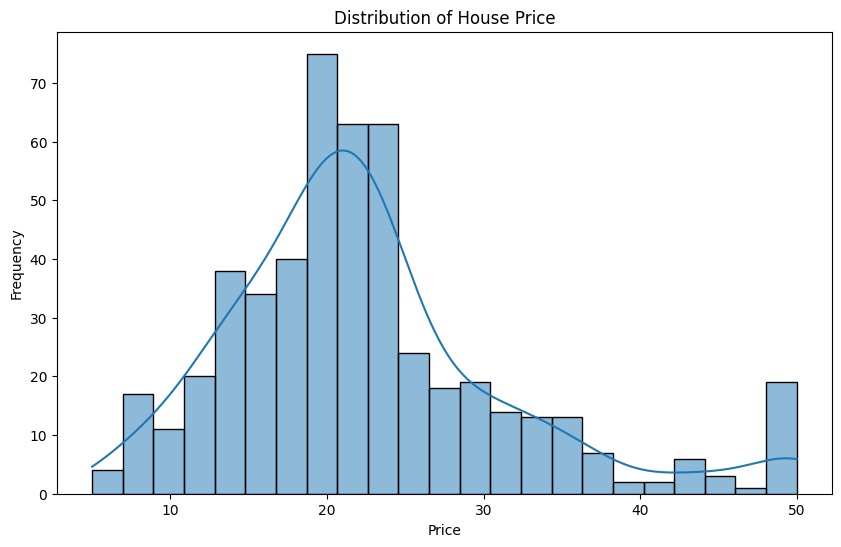

In [ ]:
# Distribution of House Price (Price)
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True)  # kde=True adds a Kernel Density Estimate curve
plt.title('Distribution of House Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### 3.2 - Correlation Heatmap

<Axes: >

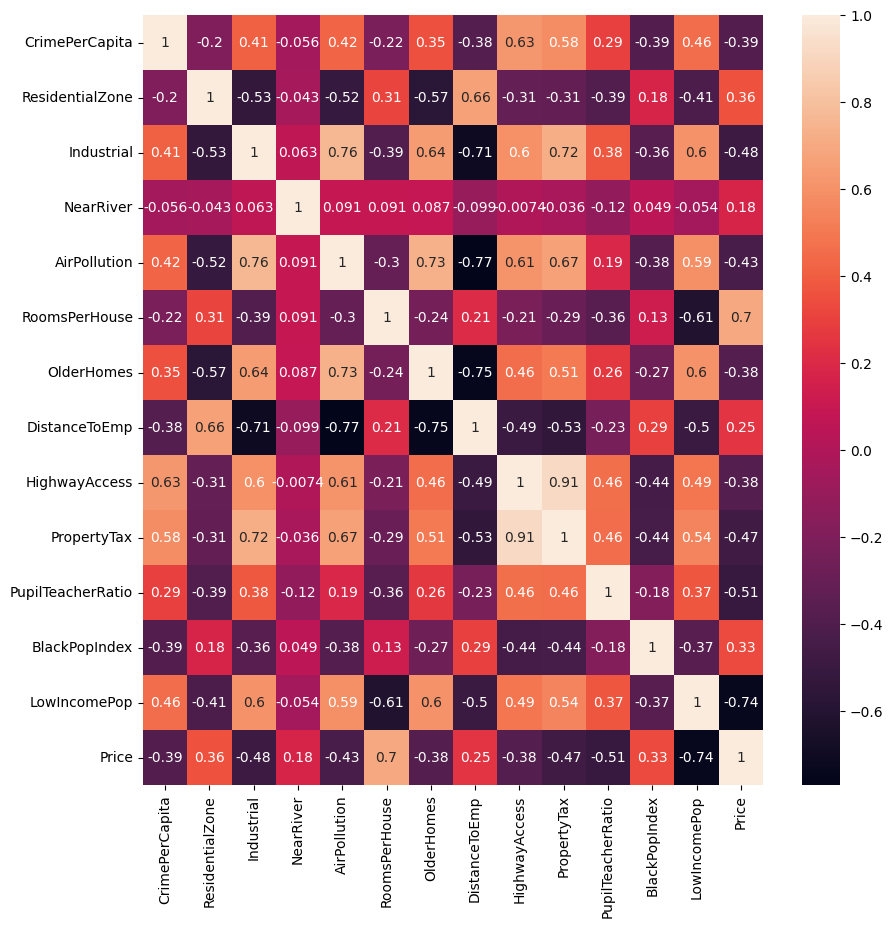

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)

#checking correlation between features and label

**Feature Selection Justification:**
- We decided to choose features with a correlation above 0.4 in absolute values with **Price**.  
- Therefore, we are going to choose **Industrial**, **AirPollution**, **RoomsPerHouse**, **PropertyTax**, **PupilTeacherRatio**, and **LowIncomePop**.  
- **PropertyTax** and **HighwayAccess** are highly correlated, which may lead to multicollinearity.  
- Based on correlation values: **PropertyTax** (-0.47) and **HighwayAccess** (-0.38), **PropertyTax** has a stronger correlation with **Price**.  
- However,  **PropertyTax** and **HighwayAccess** are independent, so in practice, we do not remove either of them.


###### Checking for Multicollinearity:

In [ ]:
# Selecting independent variables (excluding 'Price')
df_features = df[['Industrial', 'AirPollution', 'RoomsPerHouse', 'PropertyTax',
                  'PupilTeacherRatio', 'LowIncomePop', 'HighwayAccess']]

# Adding an intercept (required for VIF calculation)
df_features = sm.add_constant(df_features)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_features.columns
vif_data["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]

print(vif_data)

             Feature         VIF
0              const  411.794769
1         Industrial    3.522226
2       AirPollution    3.117028
3      RoomsPerHouse    1.750690
4        PropertyTax    8.266530
5  PupilTeacherRatio    1.567543
6       LowIncomePop    2.432773
7      HighwayAccess    6.693138


In [ ]:
df_features_noRAD = df[['Industrial', 'AirPollution', 'RoomsPerHouse', 'PropertyTax',
                  'PupilTeacherRatio', 'LowIncomePop']] # Removed HighwayAccess

df_features_noRAD = sm.add_constant(df_features_noRAD)

vif_data_noRAD = pd.DataFrame()
vif_data_noRAD["Feature"] = df_features_noRAD.columns
vif_data_noRAD["VIF"] = [variance_inflation_factor(df_features_noRAD.values, i) for i in range(df_features_noRAD.shape[1])]

print(vif_data_noRAD)

             Feature         VIF
0              const  344.129342
1         Industrial    3.247388
2       AirPollution    3.004119
3      RoomsPerHouse    1.702434
4        PropertyTax    2.600211
5  PupilTeacherRatio    1.491134
6       LowIncomePop    2.418666


### 3.3 - Pairplot

##### A pairplot shows scatter plots of the relationships between several pairs of features. This is helpful for spotting trends, outliers, and linear/nonlinear relationships between variables.

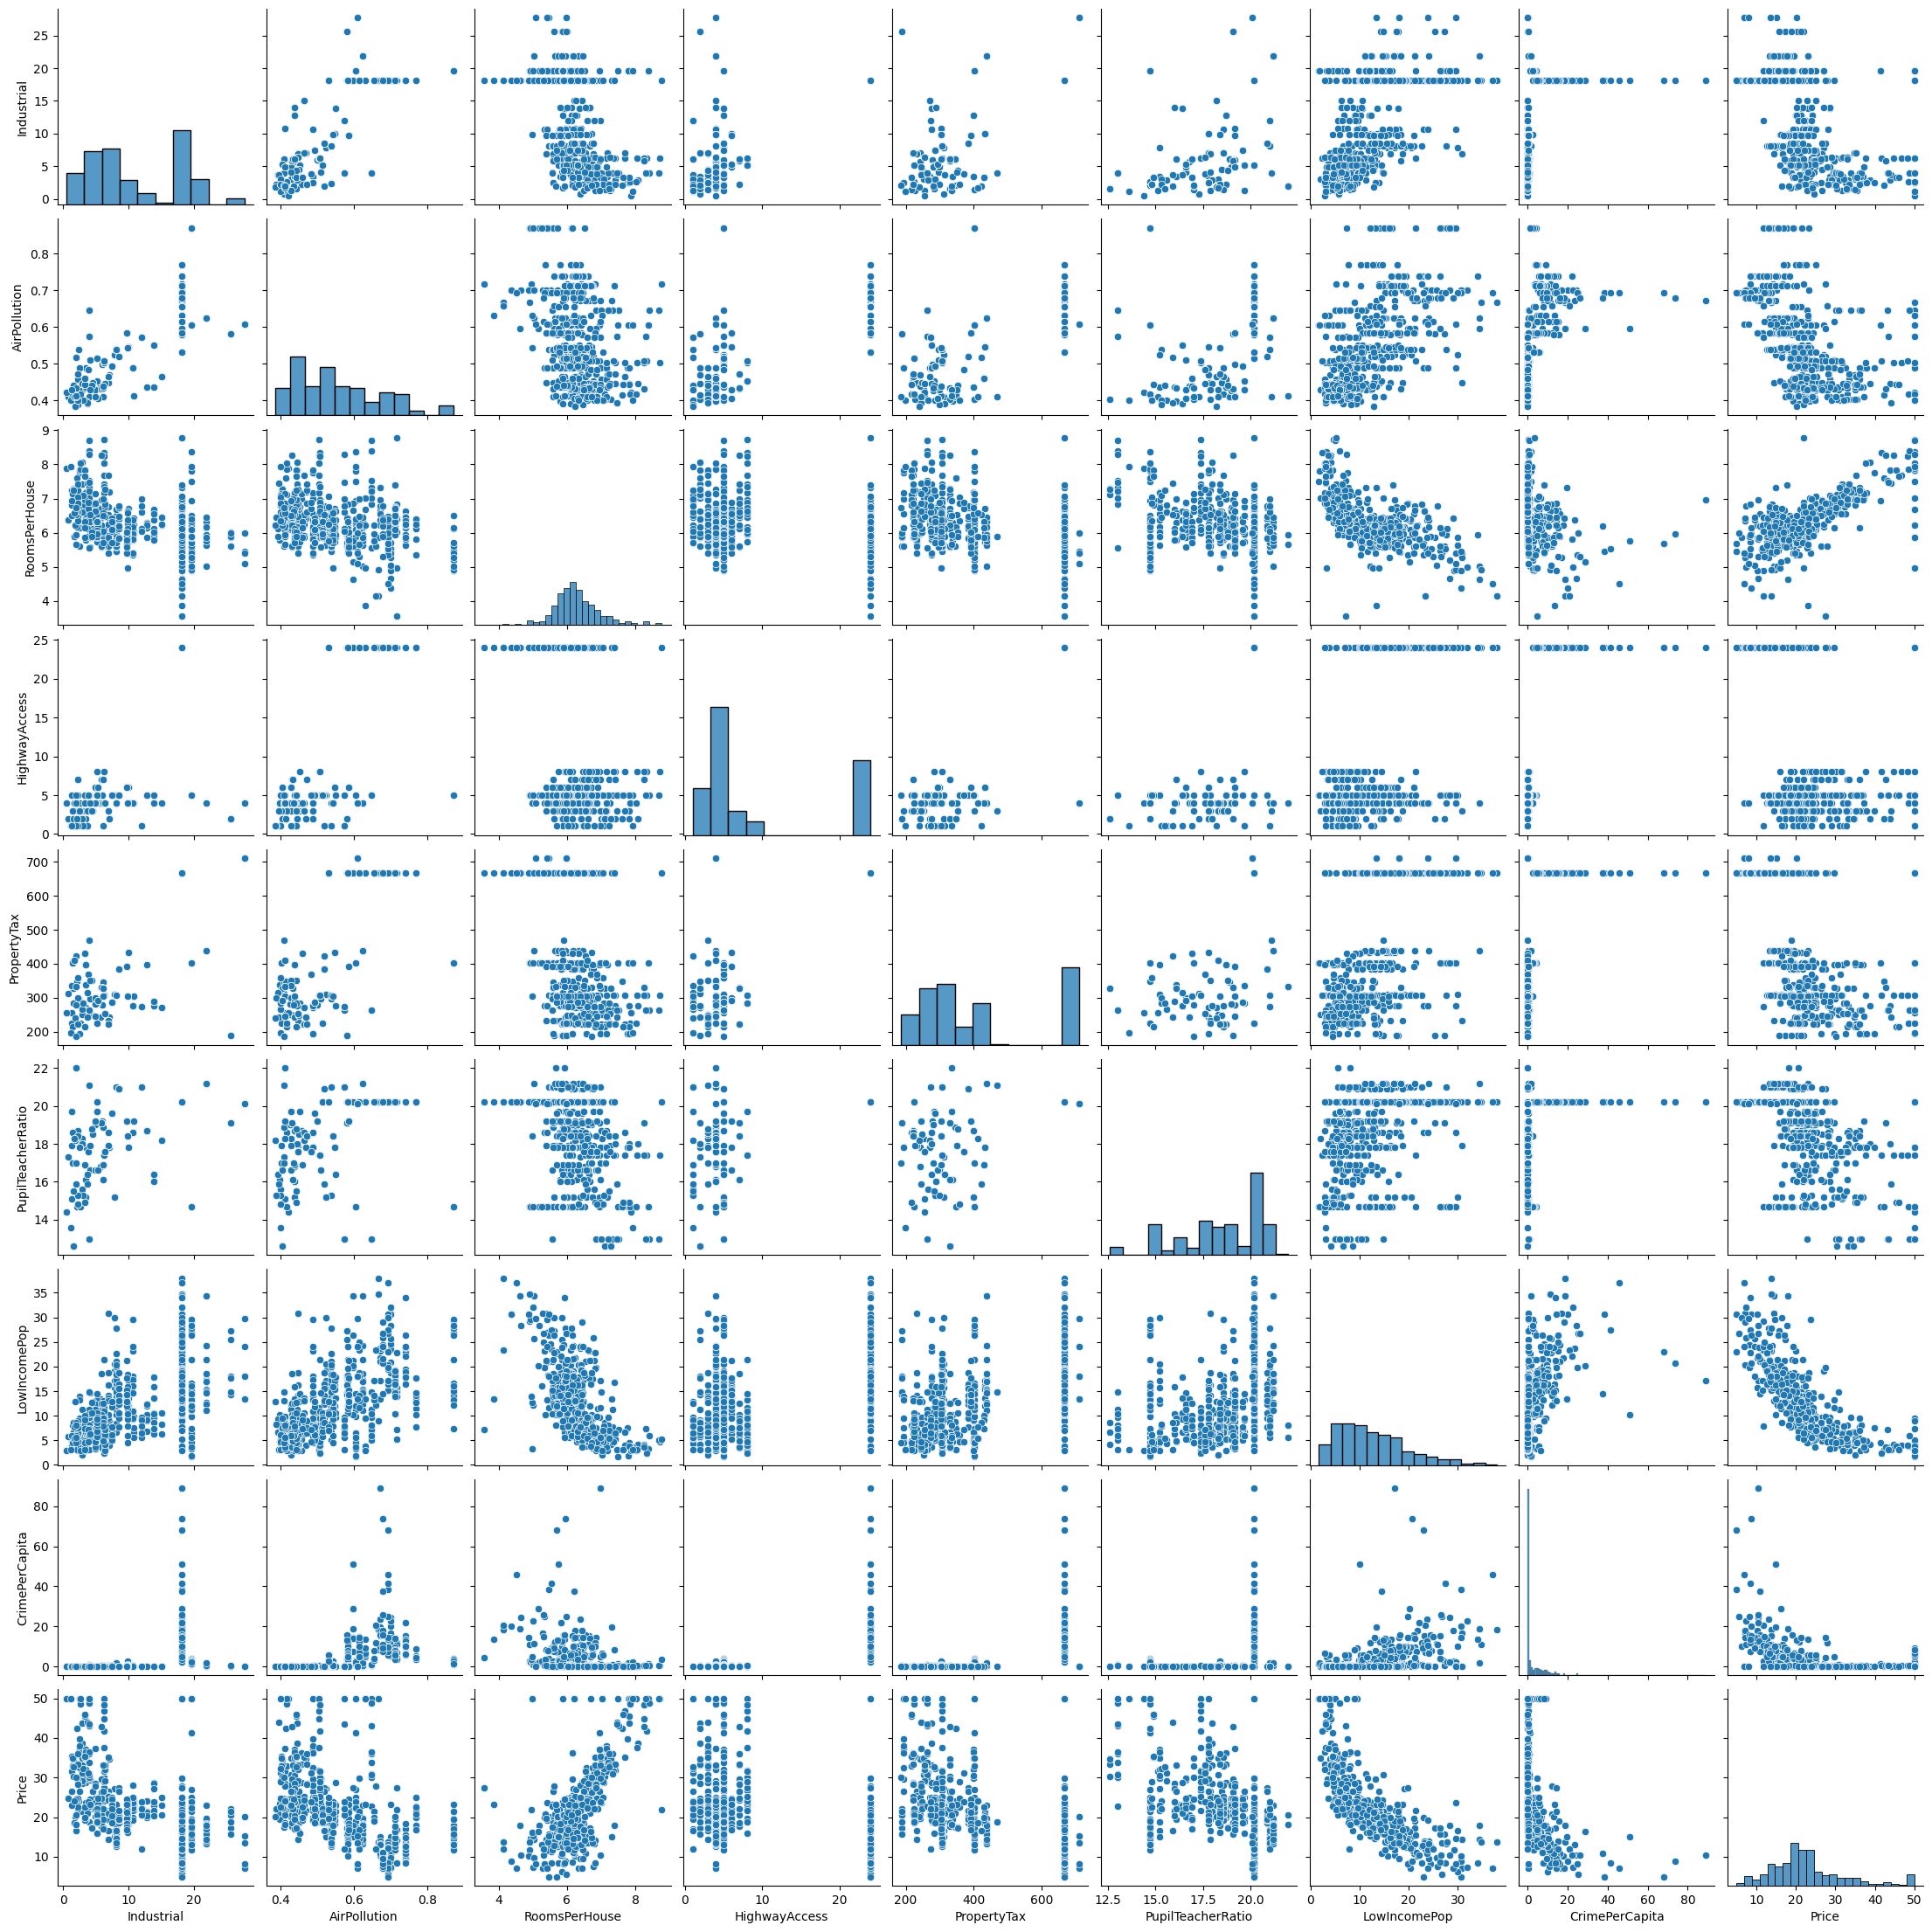

In [ ]:
## EDA: Pairplot (scatter matrix) of a subset of features
sns.pairplot(df[['Industrial', 'AirPollution', 'RoomsPerHouse', 'HighwayAccess', 'PropertyTax', 'PupilTeacherRatio', 'LowIncomePop', 'CrimePerCapita', 'Price']])  # Select features for pairplot
plt.show()

### 3.4 - Boxplots for Outlier Detection

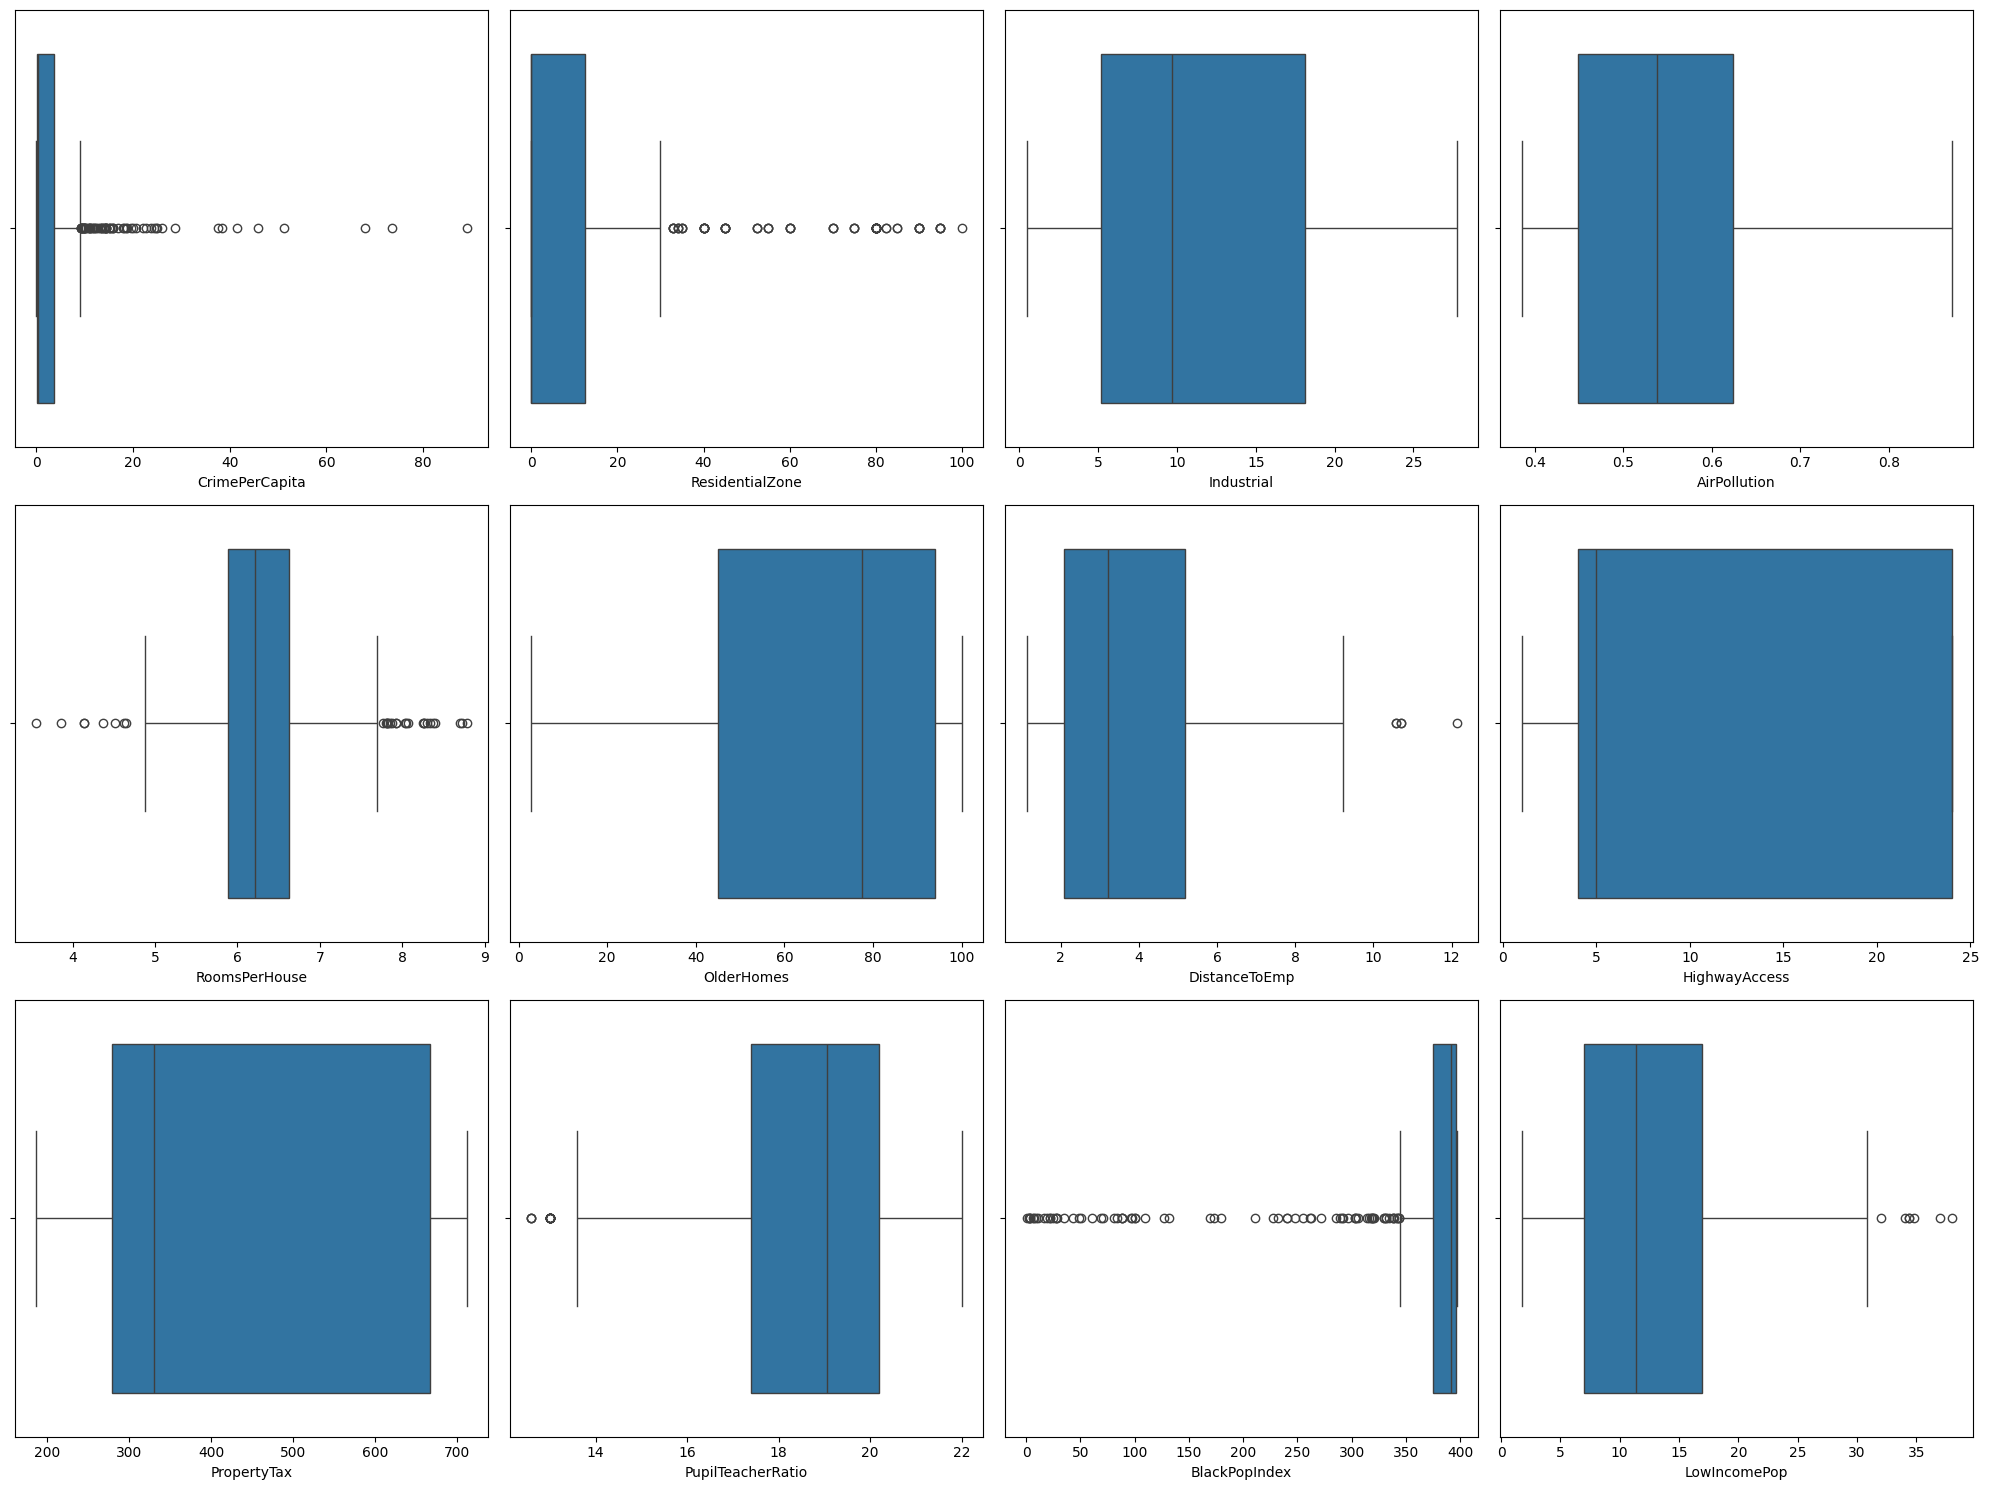

In [ ]:
# Boxplots for visualizing distributions
column_headers = [
    'CrimePerCapita',      # Per capita crime rate
    'ResidentialZone',     # Proportion of land for large lots
    'Industrial',          # Proportion of industrial (non-retail) area
    'AirPollution',        # Nitric oxide concentration
    'RoomsPerHouse',       # Average number of rooms per house
    'OlderHomes',          # Proportion of homes built before 1940
    'DistanceToEmp',       # Weighted distance to employment centers
    'HighwayAccess',            # Accessibility to highways
    'PropertyTax',         # Property tax rate per $10,000
    'PupilTeacherRatio',   # Student-teacher ratio
    'BlackPopIndex',       # Custom index related to Black population
    'LowIncomePop'        # Percentage of low-income population
]

# Adjust the subplot layout to accommodate all columns
# Calculate the number of rows needed:
num_rows = int(np.ceil(len(column_headers) / 4))  # 3 rows for 12 headers

fig, ax = plt.subplots(num_rows, 4, figsize=(20, 15))  # Updated figsize

i = 1
for column in column_headers:
    # Calculate row and column index using divmod
    row_index, col_index = divmod(i - 1, 4)

    plt.subplot(num_rows, 4, i)  # Use calculated num_rows
    sns.boxplot(x=df[column])
    i += 1

plt.tight_layout()
plt.show()

In [ ]:
df.PupilTeacherRatio.value_counts()

,count
PupilTeacherRatio,
20.2,140
14.7,34
21.0,27
17.8,23
19.2,19
17.4,18
18.6,17
19.1,17
18.4,16


### **Interpretation of Boxplots**

When considering outliers we need to differentiate between statistical and ML considerations. As visible in all of the charts, it does not seem like the points outside of the IQR represent a wide distribution and not outliers per se. PupilTeacherRatio required some further investigation, however with the valuecounts it appears as a wide distribution as well. In conclusion, there are no outliers to handle.

### 3.5 - Specific Features EDA

In [ ]:
df_EDA = df.copy()

### *CRIME*

In [ ]:
# CRIME
# Get descriptive statistics to understand the distribution
crime_stats = df_EDA['CrimePerCapita'].describe()
print(crime_stats)

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CrimePerCapita, dtype: float64



Crime Rate with Categories:
   CrimePerCapita   Crimen_Category
0         0.00632  Very Low [0-0.1]
1         0.02731  Very Low [0-0.1]
2         0.02729  Very Low [0-0.1]
3         0.03237  Very Low [0-0.1]
4         0.06905  Very Low [0-0.1]


<ipython-input-152-6503765b7266>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_EDA, x='Crimen_Category', palette='coolwarm')


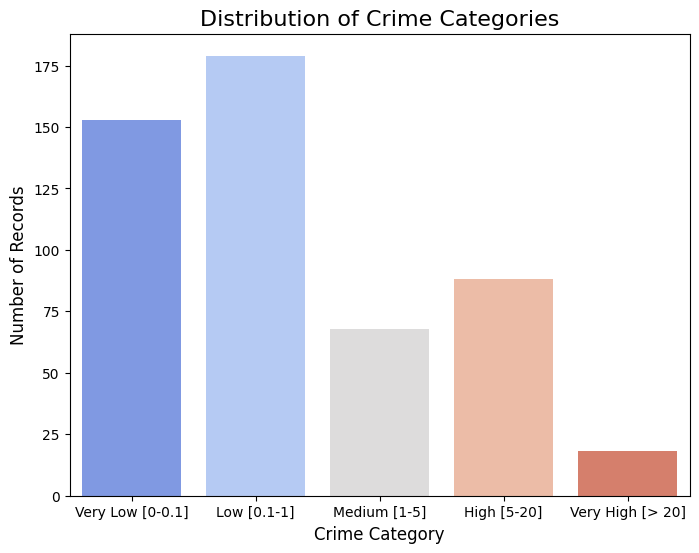

In [ ]:
# Define bins and labels for crime categories
bins = [0, 0.1, 1, 5, 20, np.inf]
labels = ["Very Low [0-0.1]", "Low [0.1-1]", "Medium [1-5]", "High [5-20]", "Very High [> 20]"]

# Create a new column for crime categories
df_EDA['Crimen_Category'] = pd.cut(df_EDA['CrimePerCapita'], bins=bins, labels=labels)

# Display the first rows to verify the new categories
print("\nCrime Rate with Categories:")
print(df_EDA[['CrimePerCapita', 'Crimen_Category']].head())

# Visualization: Bar plot of crime categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df_EDA, x='Crimen_Category', palette='coolwarm')
plt.title('Distribution of Crime Categories', fontsize=16)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


### *AIR POLLUTION*

In [ ]:
# Get descriptive statistics
pollution_stats = df_EDA['AirPollution'].describe()
print("Descriptive Statistics for Air Pollution:")
print(pollution_stats)

Descriptive Statistics for Air Pollution:
count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: AirPollution, dtype: float64



Air Pollution with Categories:
   AirPollution Pollution_Category
0         0.538   Moderate [0.5-1]
1         0.469      Low [0.2-0.5]
2         0.469      Low [0.2-0.5]
3         0.458      Low [0.2-0.5]
4         0.458      Low [0.2-0.5]


<ipython-input-154-554acc19798b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_EDA, x='Pollution_Category', palette='coolwarm')


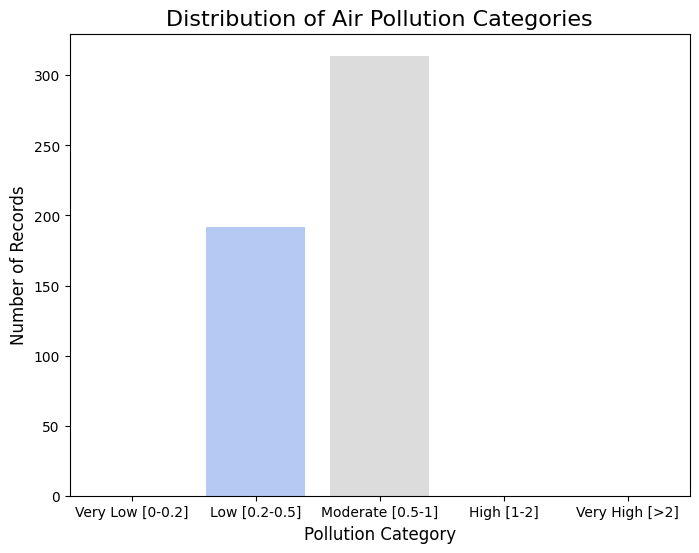

In [ ]:
# Define bins and labels for air pollution categories
bins = [0, 0.2, 0.5, 1.0, 2.0, np.inf]
labels = ["Very Low [0-0.2]", "Low [0.2-0.5]", "Moderate [0.5-1]", "High [1-2]", "Very High [>2]"]

# Create a new column for pollution categories
df_EDA['Pollution_Category'] = pd.cut(df_EDA['AirPollution'], bins=bins, labels=labels)

# Display the first rows to verify the new categories
print("\nAir Pollution with Categories:")
print(df_EDA[['AirPollution', 'Pollution_Category']].head())

# Visualization: Bar plot of pollution categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df_EDA, x='Pollution_Category', palette='coolwarm')
plt.title('Distribution of Air Pollution Categories', fontsize=16)
plt.xlabel('Pollution Category', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

###*PROPERTY TAX RATE*

In [ ]:
# Get descriptive statistics
tax_rate_stats = df_EDA['PropertyTax'].describe()
print("Descriptive Statistics for Property Tax Rate:")
print(tax_rate_stats)

Descriptive Statistics for Property Tax Rate:
count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: PropertyTax, dtype: float64



Property Tax Rate with Categories:
   PropertyTax TaxRate_Category
0          296    Low [200-400]
1          242    Low [200-400]
2          242    Low [200-400]
3          222    Low [200-400]
4          222    Low [200-400]


<ipython-input-156-b2f36d3f24a9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_EDA, x='TaxRate_Category', palette='coolwarm')


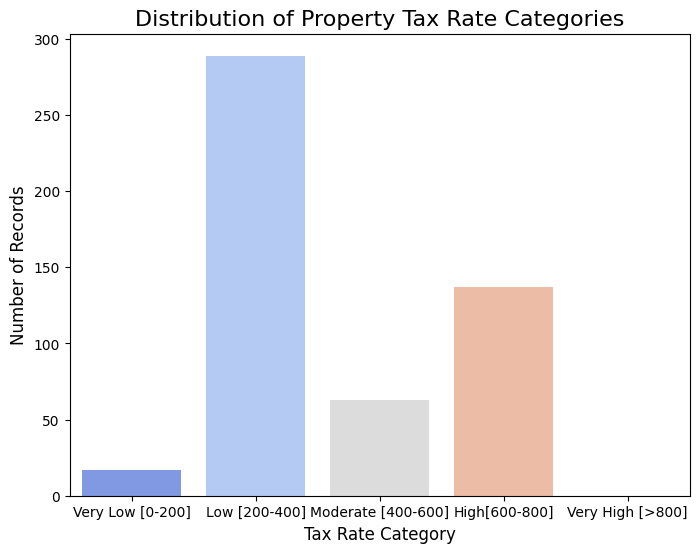

In [ ]:
# Define bins and labels for tax rate categories
bins = [0, 200, 400, 600, 800, np.inf]
labels = ["Very Low [0-200]", "Low [200-400]", "Moderate [400-600]", "High[600-800]", "Very High [>800]"]

# Create a new column for tax rate categories
df_EDA['TaxRate_Category'] = pd.cut(df_EDA['PropertyTax'], bins=bins, labels=labels)

# Display the first rows to verify the new categories
print("\nProperty Tax Rate with Categories:")
print(df_EDA[['PropertyTax', 'TaxRate_Category']].head())

# Visualization: Bar plot of tax rate categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df_EDA, x='TaxRate_Category', palette='coolwarm')
plt.title('Distribution of Property Tax Rate Categories', fontsize=16)
plt.xlabel('Tax Rate Category', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### *PUPIL TEACHER RATIO*

In [ ]:
# Get descriptive statistics
ptr_stats = df_EDA['PupilTeacherRatio'].describe()
print("Descriptive Statistics for Pupil-Teacher Ratio:")
print(ptr_stats)

Descriptive Statistics for Pupil-Teacher Ratio:
count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PupilTeacherRatio, dtype: float64



Pupil-Teacher Ratio with Categories:
   PupilTeacherRatio      PTR_Category
0               15.3       Low [15-18]
1               17.8       Low [15-18]
2               17.8       Low [15-18]
3               18.7  Moderate [18-21]
4               18.7  Moderate [18-21]


<ipython-input-158-7ed9bc513f16>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_EDA, x='PTR_Category', palette='coolwarm')


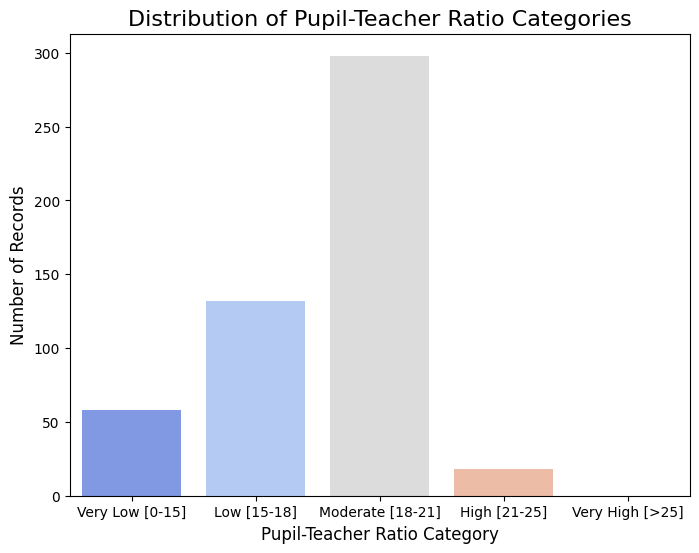

In [ ]:
# Define bins and labels for pupil-teacher ratio categories
bins = [0, 15, 18, 21, 25, np.inf]
labels = ["Very Low [0-15]", "Low [15-18]", "Moderate [18-21]", "High [21-25]", "Very High [>25]"]

# Create a new column for pupil-teacher ratio categories
df_EDA['PTR_Category'] = pd.cut(df_EDA['PupilTeacherRatio'], bins=bins, labels=labels)

# Display the first rows to verify the new categories
print("\nPupil-Teacher Ratio with Categories:")
print(df_EDA[['PupilTeacherRatio', 'PTR_Category']].head())

# Visualization: Bar plot of pupil-teacher ratio categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df_EDA, x='PTR_Category', palette='coolwarm')
plt.title('Distribution of Pupil-Teacher Ratio Categories', fontsize=16)
plt.xlabel('Pupil-Teacher Ratio Category', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## **STEP 4 - Preparing Datasets for Model Creation**
In this step, we prepare the datasets that will be used in the subsequent model training and evaluation step. The goal is to evaluate how these different levels of feature selection (based on correlation thresholds) affect model performance in the regression task.

#### Three Datasets Overview:

1. **df**: The original dataset, containing all available variables.
2. **df1**: A filtered dataset created by applying a correlation threshold of 0.4. Only variables with a correlation coefficient above this threshold are retained.
3. **df2**: A filtered dataset created by applying a correlation threshold of 0.2. This threshold allows more variables to be included compared to df1.

In [ ]:
df
df1 = df[['Industrial', 'AirPollution', 'RoomsPerHouse', 'PropertyTax',
          'PupilTeacherRatio', 'LowIncomePop', 'CrimePerCapita', 'Price']]

df2 = df[['CrimePerCapita', 'ResidentialZone', 'Industrial', 'AirPollution',
          'RoomsPerHouse', 'OlderHomes', 'DistanceToEmp', 'BlackPopIndex',
          'PropertyTax', 'PupilTeacherRatio', 'LowIncomePop', 'Price']]


# Verifying shapes of the datasets
print(f"Original dataset shape (df): {df.shape}")
print(f"Dataset with 0.4 correlation threshold (df1): {df1.shape}")
print(f"Dataset with 0.2 correlation threshold (df2): {df2.shape}")


Original dataset shape (df): (506, 14)
Dataset with 0.4 correlation threshold (df1): (506, 8)
Dataset with 0.2 correlation threshold (df2): (506, 12)


##**STEP 5 - MODEL TRAINING AND EVALUATION**

### Train/Test Split and Model Training for df, df1 and df2
In the following code we will replicate the steps applied to df for the following datasets:
- **df**: Contains all the variables.
- **df1**: Dataset created with the 0.4 correlation threshold.
- **df2**: Dataset created with the 0.2 correlation threshold.

### Evaluation Metrics
To compare the performance of the models trained on the three datasets, we compute the following metrics:
- **RMSE**: Root Mean Squared Error
- **MAE**: Mean Absolute Error
- **\( R^2 \) Score**: Coefficient of determination

By comparing these metrics, we aim to determine which model performs best and is more suitable for our regression task.


## Model I: **df**
#### The original dataset, containing all available variables without any filtering.

In [ ]:
# The label we are trying to predict is the Price column
# Separate out the data into X features and y labels
X_df = df.drop('Price', axis=1)
y_df = df['Price']


# SPLIT INTO TRAINING AND TEST SETS
# We use scikit-learn to split up X and y into a training set and test set
#Since we will later be using a Grid Search strategy, we set the test proportion to 10%
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.10, random_state=101)

# SCALING THE FEATURES (important for models like ElasticNet)
scaler_df = StandardScaler()
scaled_X_train_df = scaler_df.fit_transform(X_train_df)    # Fit and transform on df's training data
scaled_X_test_df = scaler_df.transform(X_test_df)

####**Regularization**
We will use an Elastic Net model. Create an instance of default ElasticNet
model with scikit-learn


In [ ]:
base_elastic_model = ElasticNet()

In [ ]:
ElasticNet

sklearn.linear_model._coordinate_descent.ElasticNet

####**Grid Search and Cross Validation**

In [ ]:
# PARAMETER GRID DEFINITION
# The Elastic Net model has two main parameters, alpha and the L1 ratio.
# Create a dictionary parameter grid of values for the ElasticNet
param_grid = {'alpha': [0.1, 1, 5, 10, 50, 100],
              'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

# Grid search for ElasticNet with the df dataset
# Using scikit-learn create a GridSearchCV object and run a grid search for the best parameters for your model based on your scaled training data.
grid_model_df = GridSearchCV(estimator=base_elastic_model,
                             param_grid=param_grid,
                             scoring='neg_mean_squared_error',
                             cv=5,
                             verbose=1)

# Training the model with the best parameters
grid_model_df.fit(scaled_X_train_df, y_train_df)

# Display the best parameters
print(f'Best parameters for df: {grid_model_df.best_params_}')


Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters for df: {'alpha': 0.1, 'l1_ratio': 0.5}


MODEL I EVALUATION

In [ ]:
# Evaluate for df
y_pred_train_df = grid_model_df.predict(scaled_X_train_df)
y_pred_test_df = grid_model_df.predict(scaled_X_test_df)

# Training metrics
mae_train_df = mean_absolute_error(y_train_df, y_pred_train_df)
rmse_train_df = np.sqrt(mean_squared_error(y_train_df, y_pred_train_df))
r2_train_df = r2_score(y_train_df, y_pred_train_df)

# Test metrics
mae_test_df = mean_absolute_error(y_test_df, y_pred_test_df)
rmse_test_df = np.sqrt(mean_squared_error(y_test_df, y_pred_test_df))
r2_test_df = r2_score(y_test_df, y_pred_test_df)

mean_price_df = np.mean(df['Price'])

print(f"### Evaluation for df ###")
print(f'Training Set - Mean Absolute Error (MAE): {mae_train_df}')
print(f'Training Set - Root Mean Squared Error (RMSE): {rmse_train_df}')
print(f'Training Set - R-squared (R2): {r2_train_df}')

print(f'Test Set - Mean Absolute Error (MAE): {mae_test_df}')
print(f'Test Set - Root Mean Squared Error (RMSE): {rmse_test_df}')
print(f'Test Set - Mean Price: {mean_price_df}')
print(f'Test Set - R-squared (R2): {r2_test_df}')

### Evaluation for df ###
Training Set - Mean Absolute Error (MAE): 3.117261028712665
Training Set - Root Mean Squared Error (RMSE): 4.6028634157802575
Training Set - R-squared (R2): 0.728495163375577
Test Set - Mean Absolute Error (MAE): 4.051194432967592
Test Set - Root Mean Squared Error (RMSE): 6.045155061191136
Test Set - Mean Price: 22.532806324110677
Test Set - R-squared (R2): 0.720209195606158


## Model II: **df1**
#### A filtered dataset created by applying a correlation threshold of 0.4.

In [ ]:
# Define X (features) and y (target) for df1
X_df1 = df1.drop('Price', axis=1)
y_df1 = df1['Price']

# Split into training and test sets
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(X_df1, y_df1, test_size=0.10, random_state=101)

# Scaling the features
scaler_df1 = StandardScaler()
scaled_X_train_df1 = scaler_df1.fit_transform(X_train_df1)
scaled_X_test_df1 = scaler_df1.transform(X_test_df1)

In [ ]:
# Grid search for ElasticNet with df1
grid_model_df1 = GridSearchCV(estimator=base_elastic_model,
                              param_grid=param_grid,
                              scoring='neg_mean_squared_error',
                              cv=5,
                              verbose=1)

# Fit the model on the training data
grid_model_df1.fit(scaled_X_train_df1, y_train_df1)

# Display the best parameters
print(f'Best parameters for df1: {grid_model_df1.best_params_}')

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters for df1: {'alpha': 0.1, 'l1_ratio': 0.5}


In [ ]:
# Evaluate for df1
y_pred_train_df1 = grid_model_df1.predict(scaled_X_train_df1)
y_pred_test_df1 = grid_model_df1.predict(scaled_X_test_df1)

# Training metrics
mae_train_df1 = mean_absolute_error(y_train_df1, y_pred_train_df1)
rmse_train_df1 = np.sqrt(mean_squared_error(y_train_df1, y_pred_train_df1))
r2_train_df1 = r2_score(y_train_df1, y_pred_train_df1)

# Test metrics
mae_test_df1 = mean_absolute_error(y_test_df1, y_pred_test_df1)
rmse_test_df1 = np.sqrt(mean_squared_error(y_test_df1, y_pred_test_df1))
r2_test_df1 = r2_score(y_test_df1, y_pred_test_df1)

mean_price_df1 = np.mean(df1['Price'])

In [ ]:
print(f"### Evaluation for df1 ###")
print(f'Training Set - Mean Absolute Error (MAE): {mae_train_df1}')
print(f'Training Set - Root Mean Squared Error (RMSE): {rmse_train_df1}')
print(f'Training Set - R-squared (R2): {r2_train_df1}')

print(f'Test Set - Mean Absolute Error (MAE): {mae_test_df1}')
print(f'Test Set - Root Mean Squared Error (RMSE): {rmse_test_df1}')
print(f'Test Set - Mean Price: {mean_price_df1}')
print(f'Test Set - R-squared (R2): {r2_test_df1}')

### Evaluation for df1 ###
Training Set - Mean Absolute Error (MAE): 3.4874491479210086
Training Set - Root Mean Squared Error (RMSE): 5.0347029812112325
Training Set - R-squared (R2): 0.6751602974160231
Test Set - Mean Absolute Error (MAE): 4.212942105450254
Test Set - Root Mean Squared Error (RMSE): 6.580860350110718
Test Set - Mean Price: 22.532806324110677
Test Set - R-squared (R2): 0.6684233829757189


## Model III: **df2**
#### A filtered dataset created by applying a correlation threshold of 0.2.

In [ ]:
# Define X (features) and y (target) for df2
X_df2 = df2.drop('Price', axis=1)
y_df2 = df2['Price']

# Split into training and test sets
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(X_df2, y_df2, test_size=0.10, random_state=101)

# Scaling the features
scaler_df2 = StandardScaler()
scaled_X_train_df2 = scaler_df2.fit_transform(X_train_df2)
scaled_X_test_df2 = scaler_df2.transform(X_test_df2)

In [ ]:
# Grid search for ElasticNet with df2
grid_model_df2 = GridSearchCV(estimator=base_elastic_model,
                              param_grid=param_grid,
                              scoring='neg_mean_squared_error',
                              cv=5,
                              verbose=1)

# Fit the model on the training data
grid_model_df2.fit(scaled_X_train_df2, y_train_df2)

# Display the best parameters
print(f'Best parameters for df2: {grid_model_df2.best_params_}')

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters for df2: {'alpha': 0.1, 'l1_ratio': 0.9}


In [ ]:
# Evaluate for df2
y_pred_train_df2 = grid_model_df2.predict(scaled_X_train_df2)
y_pred_test_df2 = grid_model_df2.predict(scaled_X_test_df2)

# Training metrics
mae_train_df2 = mean_absolute_error(y_train_df2, y_pred_train_df2)
rmse_train_df2 = np.sqrt(mean_squared_error(y_train_df2, y_pred_train_df2))
r2_train_df2 = r2_score(y_train_df2, y_pred_train_df2)

# Test metrics
mae_test_df2 = mean_absolute_error(y_test_df2, y_pred_test_df2)
rmse_test_df2 = np.sqrt(mean_squared_error(y_test_df2, y_pred_test_df2))
r2_test_df2 = r2_score(y_test_df2, y_pred_test_df2)

mean_price_df2 = np.mean(df2['Price'])

In [ ]:
print(f"### Evaluation for df2 ###")
print(f'Training Set - Mean Absolute Error (MAE): {mae_train_df2}')
print(f'Training Set - Root Mean Squared Error (RMSE): {rmse_train_df2}')
print(f'Training Set - R-squared (R2): {r2_train_df2}')

print(f'Test Set - Mean Absolute Error (MAE): {mae_test_df2}')
print(f'Test Set - Root Mean Squared Error (RMSE): {rmse_test_df2}')
print(f'Test Set - Mean Price: {mean_price_df2}')
print(f'Test Set - R-squared (R2): {r2_test_df2}')

### Evaluation for df2 ###
Training Set - Mean Absolute Error (MAE): 3.1944199308714385
Training Set - Root Mean Squared Error (RMSE): 4.6884810454776
Training Set - R-squared (R2): 0.7183007284926499
Test Set - Mean Absolute Error (MAE): 4.2067760749082845
Test Set - Root Mean Squared Error (RMSE): 6.2846295463316455
Test Set - Mean Price: 22.532806324110677
Test Set - R-squared (R2): 0.6976026979158845


### Test Set Results Comparison ###
  Dataset  MAE Test  RMSE Test   R2 Test
0      df  4.051194   6.045155  0.720209
1     df1  4.212942   6.580860  0.668423
2     df2  4.206776   6.284630  0.697603


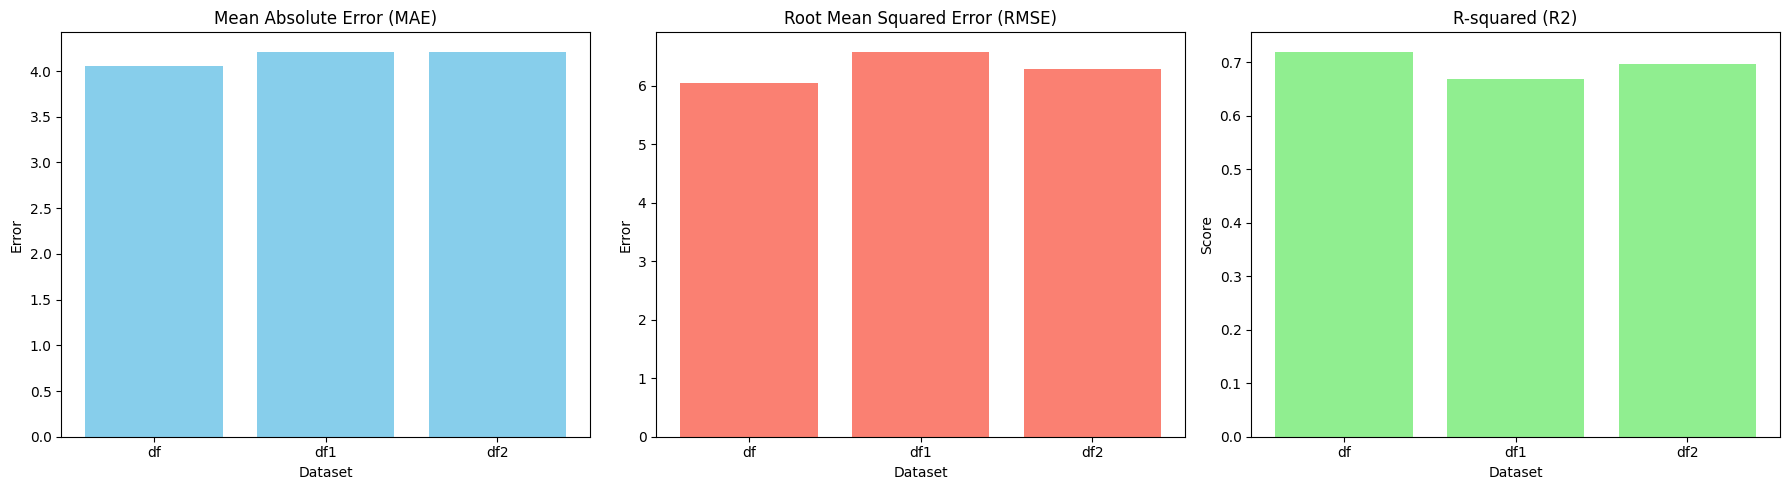

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Organize results into a DataFrame
results = pd.DataFrame({
    'Dataset': ['df', 'df1', 'df2'],
    'MAE Test': [mae_test_df, mae_test_df1, mae_test_df2],
    'RMSE Test': [rmse_test_df, rmse_test_df1, rmse_test_df2],
    'R2 Test': [r2_test_df, r2_test_df1, r2_test_df2]
})

# Display the table
print("### Test Set Results Comparison ###")
print(results)

# Plotting a bar chart for MAE, RMSE, and R2
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE Bar Chart
axes[0].bar(results['Dataset'], results['MAE Test'], color='skyblue')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('Error')
axes[0].set_xlabel('Dataset')

# RMSE Bar Chart
axes[1].bar(results['Dataset'], results['RMSE Test'], color='salmon')
axes[1].set_title('Root Mean Squared Error (RMSE)')
axes[1].set_ylabel('Error')
axes[1].set_xlabel('Dataset')

# R2 Bar Chart
axes[2].bar(results['Dataset'], results['R2 Test'], color='lightgreen')
axes[2].set_title('R-squared (R2)')
axes[2].set_ylabel('Score')
axes[2].set_xlabel('Dataset')

# Display the plots
plt.tight_layout()
plt.show()


The results indicate that **df** performs best across all metrics, with the lowest MAE (4.05) and RMSE (6.05), and the highest \( R^2 \) (0.72). This suggests that including all features without applying a correlation threshold yields better predictive accuracy and explains more variance in the target variable. While **df1** (0.4 threshold) simplifies the model by using fewer features, it sacrifices performance, as shown by its higher RMSE and lower \( R^2 \). **df2** (0.2 threshold) balances feature reduction and performance but still underperforms compared to **df**.

However, for this particular case, a regression model falls short and does not fully capture the complexity of the data. A more advanced approach, such as a neural network, could provide better predictive power by capturing non-linear relationships between features.


##**STEP 6 - DEPLOY THE MODEL**

In [ ]:
import pickle

In [ ]:
#Serialize the scaler
scaler_filename = "scaler.pkl"
pickle.dump(scaler_df, open(scaler_filename, "wb"))

In [ ]:
filename = 'trained_model.pkl'
pickle.dump(grid_model_df, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('trained_model.pkl','rb'))